In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#to make plots more beautifull
plt.style.use("ggplot")

In [2]:
df=pd.read_csv("/content/crop_production.csv")

In [3]:
#dataframes
df.head()

,State_Name,Crop_Type,Crop,N,P,K,pH,rainfall,temperature,Area_in_hectares,Production_in_tons
0,andhra pradesh,kharif,cotton,120,40,20,5.46,654.34,29.266667,7300.0,9400.0
1,andhra pradesh,kharif,horsegram,20,60,20,6.18,654.34,29.266667,3300.0,1000.0
2,andhra pradesh,kharif,jowar,80,40,40,5.42,654.34,29.266667,10100.0,10200.0
3,andhra pradesh,kharif,maize,80,40,20,5.62,654.34,29.266667,2800.0,4900.0
4,andhra pradesh,kharif,moong,20,40,20,5.68,654.34,29.266667,1300.0,500.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99849 entries, 0 to 99848
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   State_Name          99849 non-null  object 
 1   Crop_Type           99849 non-null  object 
 2   Crop                99849 non-null  object 
 3   N                   99849 non-null  int64  
 4   P                   99849 non-null  int64  
 5   K                   99849 non-null  int64  
 6   pH                  99849 non-null  float64
 7   rainfall            99849 non-null  float64
 8   temperature         99849 non-null  float64
 9   Area_in_hectares    99849 non-null  float64
 10  Production_in_tons  99849 non-null  float64
dtypes: float64(5), int64(3), object(3)
memory usage: 8.4+ MB


In [5]:
#checking for null values
df.isnull().sum()

,0
State_Name,0
Crop_Type,0
Crop,0
N,0
P,0
K,0
pH,0
rainfall,0
temperature,0
Area_in_hectares,0


In [6]:
df.duplicated().sum()

0

In [7]:
df.shape

(99849, 11)

In [8]:
df.describe()

,N,P,K,pH,rainfall,temperature,Area_in_hectares,Production_in_tons
count,99849.000000,99849.000000,99849.000000,99849.000000,99849.000000,99849.000000,99849.000000,9.984900e+04
mean,69.816823,41.593656,42.037827,5.643624,701.151085,26.684154,16476.585668,3.776291e+04
std,39.571469,15.056508,28.430263,0.505283,604.701552,4.851214,43604.268231,1.222447e+05
min,10.000000,10.000000,10.000000,3.820000,3.274569,1.180000,0.580000,0.000000e+00
25%,50.000000,40.000000,20.000000,5.360000,157.310000,23.106000,130.000000,1.620000e+02
50%,75.000000,40.000000,30.000000,5.540000,579.750000,27.333333,1010.000000,1.506000e+03
75%,80.000000,60.000000,50.000000,5.960000,1110.780000,29.266667,8099.000000,1.439500e+04
max,180.000000,125.000000,200.000000,7.000000,3322.060000,35.346667,726300.000000,3.530571e+06


Data visualization

In [9]:
len(df["State_Name"].unique())

33

In [10]:
len(df["Crop"].unique())

53

In [11]:
len(df["Crop_Type"].unique())

4

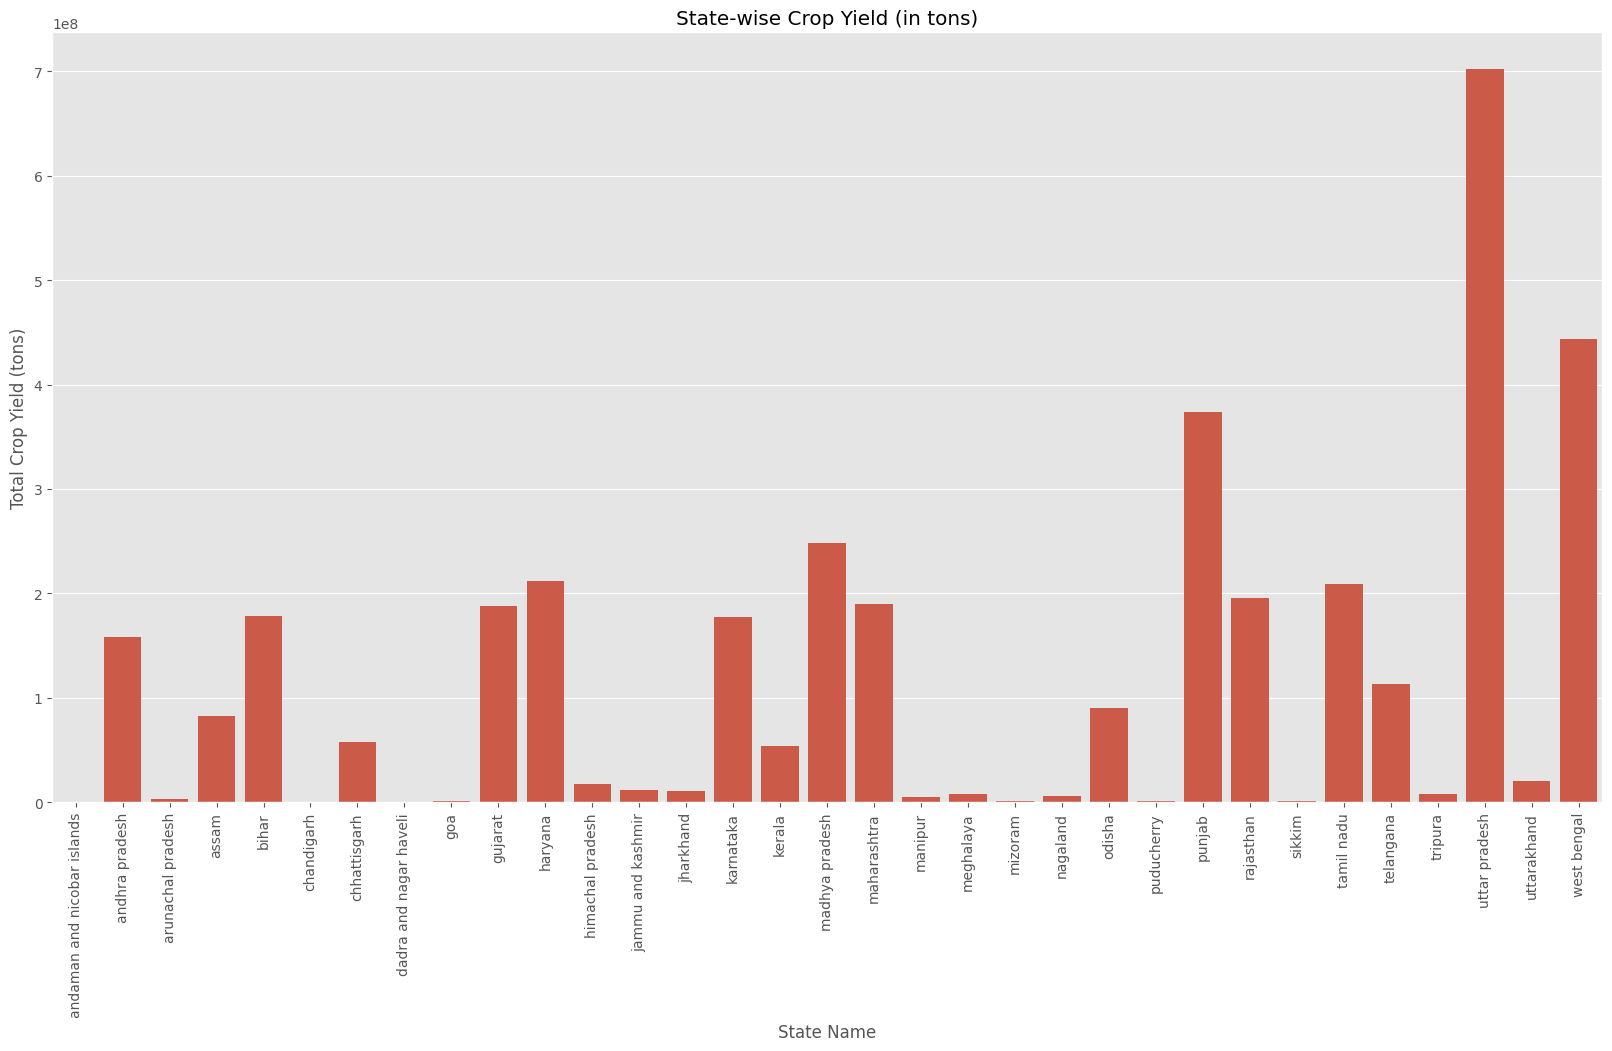

In [12]:
#amount of crop produced state wise
# Grouping by state and calculating total production
state_yield = df.groupby('State_Name')['Production_in_tons'].sum().reset_index()

# Plotting the crop yield per state
plt.figure(figsize=(20, 10))
sns.barplot(x='State_Name', y='Production_in_tons', data=state_yield)
plt.xticks(rotation=90)
plt.xlabel('State Name')
plt.ylabel('Total Crop Yield (tons)')
plt.title('State-wise Crop Yield (in tons)')
plt.show()

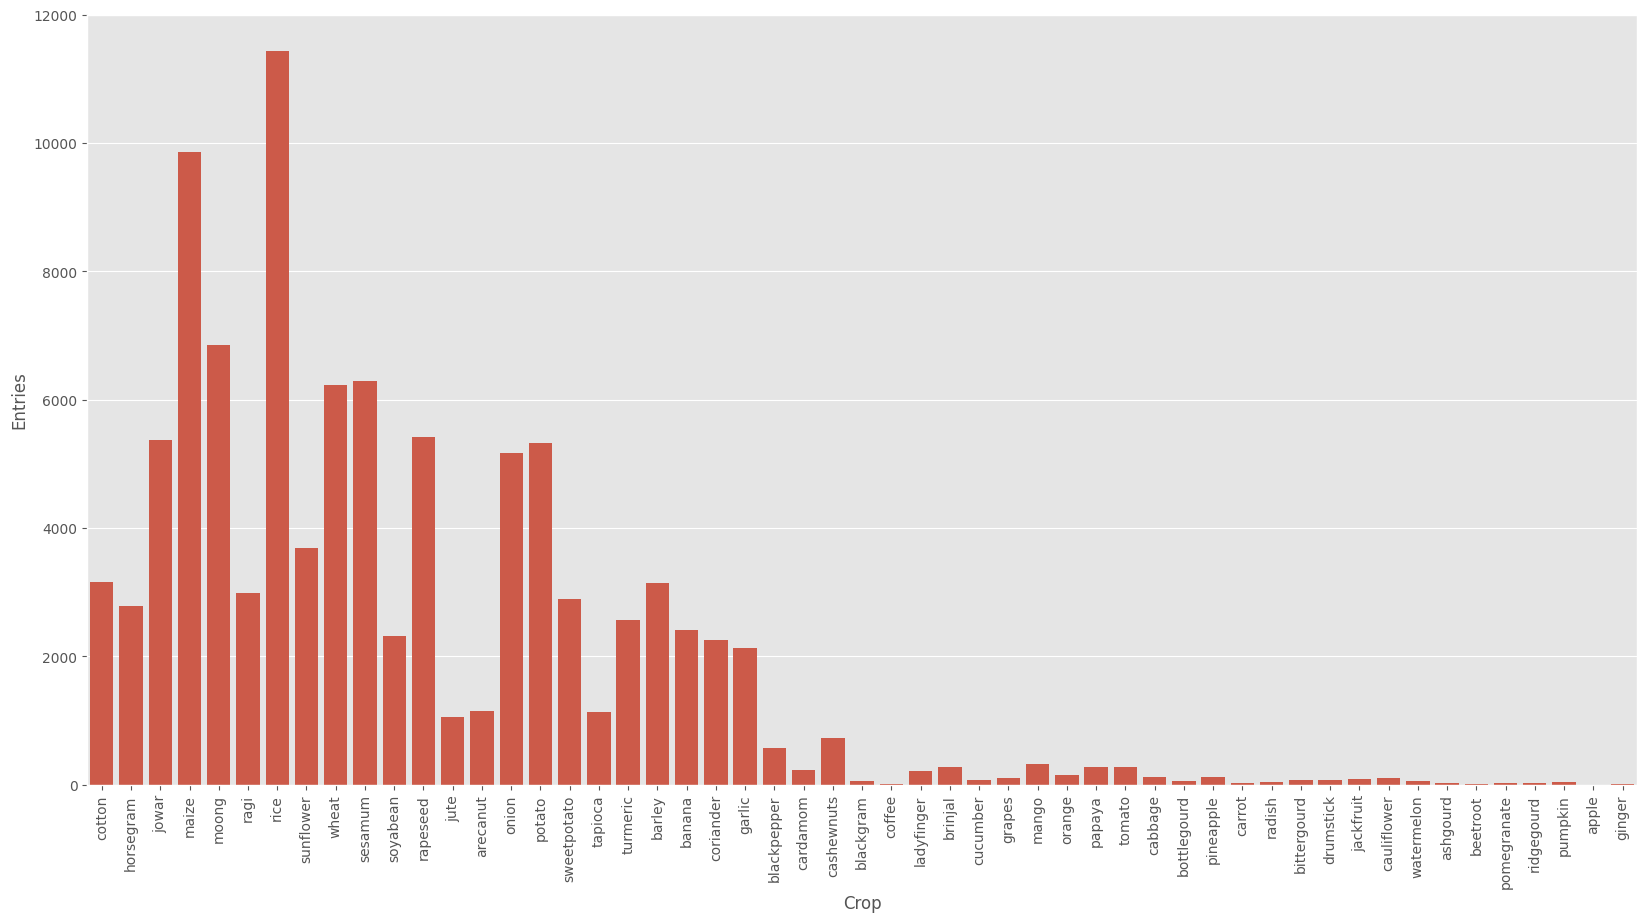

In [30]:
#number of entries crop wise
plt.figure(figsize=(20,10))
sns.countplot(x="Crop",data=df)
plt.xticks(rotation=90)
plt.ylabel('Entries')
plt.show()

In [15]:
df.columns

Index(['State_Name', 'Crop_Type', 'Crop', 'N', 'P', 'K', 'pH', 'rainfall',
       'temperature', 'Area_in_hectares', 'Production_in_tons'],
      dtype='object')

In [19]:
#Dividing dataset into dependent and independent variable
x=df.drop('Production_in_tons',axis=1)
y=df["Production_in_tons"]

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=72,shuffle=True)


Encoding

In [21]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

ohe=OneHotEncoder(drop='first')
scale=StandardScaler()

preprocesser=ColumnTransformer(                                       #Combine these preprocessing steps using ColumnTransformer
    transformers=[
    ('StandardScale',scale,['N', 'P', 'K', 'pH', 'rainfall',          #normalize numerical columns
       'temperature', 'Area_in_hectares']),
    ('OneHotEncoder',ohe,['State_Name','Crop_Type','Crop'])
    ],
    remainder='passthrough'
)

In [22]:
x_train_dummy=preprocesser.fit_transform(x_train)
x_test_dummy=preprocesser.fit_transform(x_test)

In [23]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error,r2_score

In [24]:
models={
    'LinearRegression':LinearRegression(),
    'Ridge':Ridge(),
    'Lasso':Lasso(max_iter=1000),
    'DecisionTree':DecisionTreeRegressor()
}

for name,md in models.items():
  md.fit(x_train_dummy,y_train)
  y_pred=md.predict(x_test_dummy)
  print(f"Model: {name} mean absolute error: {mean_absolute_error(y_test,y_pred)} r2 score: {r2_score(y_test,y_pred)}")

Model: LinearRegression mean absolute error: 31444.403658024406 r2 score: 0.6350683399264481
Model: Ridge mean absolute error: 31436.218853191232 r2 score: 0.6350350991714697


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 88214527520217.03, tolerance: 119818343624.54166
  model = cd_fast.sparse_enet_coordinate_descent(


Model: Lasso mean absolute error: 31421.84894744932 r2 score: 0.6350456971000529
Model: DecisionTree mean absolute error: 10961.387743949253 r2 score: 0.8908231287379744


In [25]:
dtr=DecisionTreeRegressor()
dtr.fit(x_train_dummy,y_train)
y_pred=dtr.predict(x_test_dummy)
print(f"mean absolute error: {mean_absolute_error(y_test,y_pred)} r2 score: {r2_score(y_test,y_pred)}")

mean absolute error: 11163.144988315806 r2 score: 0.8807525887905012


Predictive System

In [27]:

# Assuming 'predict' is a function and it expects a DataFrame
def predict(State_Name, Crop_Type, Crop, N, P, K, pH, rainfall, temperature, Area_in_hectares):
    # Create a DataFrame from the input data
    data = pd.DataFrame({
        'State_Name': [State_Name],
        'Crop_Type': [Crop_Type],
        'Crop': [Crop],
        'N': [N],
        'P': [P],
        'K': [K],
        'pH': [pH],
        'rainfall': [rainfall],
        'temperature': [temperature],
        'Area_in_hectares': [Area_in_hectares]
    })

    # Prediction logic here
    # For example: result = model.predict(data)
    transformed_features=preprocesser.transform(data)
    prediction=dtr.predict(transformed_features).reshape(-1,1)
    return prediction[0]




In [28]:
df.head()

,State_Name,Crop_Type,Crop,N,P,K,pH,rainfall,temperature,Area_in_hectares,Production_in_tons
0,andhra pradesh,kharif,cotton,120,40,20,5.46,654.34,29.266667,7300.0,9400.0
1,andhra pradesh,kharif,horsegram,20,60,20,6.18,654.34,29.266667,3300.0,1000.0
2,andhra pradesh,kharif,jowar,80,40,40,5.42,654.34,29.266667,10100.0,10200.0
3,andhra pradesh,kharif,maize,80,40,20,5.62,654.34,29.266667,2800.0,4900.0
4,andhra pradesh,kharif,moong,20,40,20,5.68,654.34,29.266667,1300.0,500.0


In [29]:
# Example usage
result = predict('andhra pradesh', 'kharif', 'jowar', 80, 40, 40,5.42,654.34,29.266667,10100.0)
print(result)

[10200.]


In [ ]:
import pickle
pickle.dump(dtr,open('model.pkl','wb'))
pickle.dump(preprocesser,open('preprocesser.pkl','wb'))
